# Deep Learning India - Assignment 2 : CIFAR-10 using Densenet

##### **Problem** : Achieve an accuracy beyond 85% for a Image classification using CIFAR-10 dataset based on [Densenet](https://arxiv.org/pdf/1608.06993.pdf) paper

##### Sample CIFAR-10 dataset

![CIFAR-10 Dataset](https://github.com/praveenraghuvanshi1512/Learning/blob/DeepLearningIndia_VV/Technical/AIML/DeepLearningIndia/Assignment_2/images/cifar2.jpg?raw=true)

### Steps ###
1. Initial Setup and configuration
2. Load CIFAR-10 dataset
3. Prepare Data
4. Create model pipeline
5. Compile Model
6. Train/Fit Model
7. Evaluate Model

### Step 1: Initial Setup and Configuration

    1.1 Set Keras backend
    1.2 Enable intellisense in jupyter notebook
    1.3 Initialize tensorboard
    1.4 Utility functions
        1.4.1 Display Images
        1.4.2 Plot Accuracy
        1.4.3 Plot Losses

In [22]:
# STEP 1: Initial Setup and Configuration

# 1.1 Set keras backend
from keras import backend as k
import os
import importlib

def set_keras_backend(backend):
    if k.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(k)
        assert k.backend() == backend

set_keras_backend("tensorflow")

if k.backend() == 'tensorflow':
    import tensorflow as tf
    print('tensorflow version: ', tf.__version__)
    
# 1.2 Enable intellisense in jupyter notebook
%config IPCompleter.greedy=True

# 1.3 Initialize Tensorboard
from datetime import datetime

# Define the Keras TensorBoard callback.
logdir = os.path.join(
    "logs",
    "fit",
    datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

%load_ext tensorboard

tensorflow version:  2.0.0
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


####  1.4 Utility Functions
##### 1.4.1 Display Images

In [23]:
# Utility functions

from matplotlib import pyplot
from PIL import Image

# Display images
def show_images(x):
    pyplot.figure(1)
    k = 0
    for i in range(0, 4):
        for j in range(0, 4):
            pyplot.subplot2grid((4, 4), (i, j))
            pyplot.imshow(Image.fromarray(x[k]))
            k = k + 1
    # Show the plot
    pyplot.show()

#### 1.4.2 Plot Accuracy

In [24]:
import keras
from matplotlib import pyplot as plt

def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

##### 1.4.3 Plot losses

In [25]:
# Plot Losses
import matplotlib.pyplot as plt

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

### Step 2: Load CIFAR-10 dataset

In [26]:
# Step 2: Load CIFAR-10 dataset
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data();

##### Examining Dataset

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


- There are 50000 training and 10000 testing images
- CIFAR-10 dataset has color images of shape(width, height, channels) : 32 x 32 x 3
- No of channels for a colored image : 3(Red + Green + Blue)
- No of classes : 10 - Type of objects in images such as airplane, bird, truck etc.

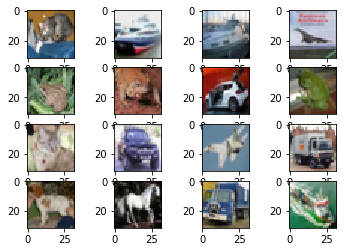

In [28]:
# Display first 16 images

show_images(X_test[:16])

### Step 3: Prepare data

In [29]:
# Intialize variables
num_classes = 10
max_pixel_value = 255
kernel_size = (3, 3)
input_filters = 64

# Input shape is a tensor of image.
# CIFAR-10 has images of dimension (witdth * height * channels[Red, Green, Blue]) as 32 x 32 x 3
input_shape = (32, 32, 3) 

batch_size = 32
epochs = 10

In [30]:
# STEP 3: Prepare Data

from keras.utils import np_utils
import numpy as np

# Converting unsigned integers to 32-bit float precision
# so that it can be better utilized during normalization such as diving by max pixel value of 255
X_train = X_train.astype(np.float32)
X_test =  X_test.astype(np.float32)

# Normalization of pixel values (to [0-1] range)
X_train /= max_pixel_value
X_test /= max_pixel_value

# Convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


##### Examining Dataset

In [31]:
print(X_train.shape, "X_train")
print(X_test.shape, "X_test")
print(y_train.shape,"y_train")
print(y_test.shape, "y_train")

(50000, 32, 32, 3) X_train
(10000, 32, 32, 3) X_test
(50000, 10) y_train
(10000, 10) y_train


In [32]:
print('X_train[0] :\n', X_train[0])
print('\n')
print('y_train[0] :\n', y_train[0:1][0])

X_train[0] :
 [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.4823529

### Step 4: Create Model Pipeline - Basic CNN

In [33]:
# STEP 4: Create Model pipeline

# Learned parameter calculation :\n",
# https://www.youtube.com/watch?v=gmBfb6LNnZs\n",
# No of parameters = (Previous layer channels * Current layer filters * kernel) + bias(current filter count)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Create model - Input Layer
# Learned Parameters: 0 . No parameters to be learned in input layer
model = Sequential()

# Now we'll add hidden layers

# First Convolution layer : filters: 64, kernel size: 3x3 
# Learned Parameters: (3 * 64 * 3 * 3) + 64 = 1792
model.add(Conv2D(input_filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))

# Second Convolution layer: filters: 32, kernel size: 3x3
# Learned Parameters: (64 * 32 * 3 * 3) + 32 = 18464
model.add(Conv2D(32, kernel_size=kernel_size, activation='relu'))

# Flatten modifies the dimension of a tensor to a vector
# Output shape : 28 * 28 * 32 = 25088
# Learned Parameters: 0. No parameters are learned here as we are just changing the dimension
model.add(Flatten())

# Dense layer - Its a fully connected layer where all neurons from previous are connected to all neurons in dense layer
# Activation - These functions allows non-linear transformations to be performed on a given input which is a complex process
# Learned Parameter: (25088 * 10) + 10 = 250890",
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250890    
Total params: 271,146
Trainable params: 271,146
Non-trainable params: 0
_________________________________________________________________


### Step 5: Compile Model - Configures model for training

In [34]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

### Step 6: Train/Fit Model
Save training loss and accuracy to history object for later visualization

In [35]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.4273 - accuracy: 0.4924 - val_loss: 1.2139 - val_accuracy: 0.5756
Epoch 2/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.1129 - accuracy: 0.6108 - val_loss: 1.1081 - val_accuracy: 0.6143
Epoch 3/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.9654 - accuracy: 0.6650 - val_loss: 1.1163 - val_accuracy: 0.6081
Epoch 4/10
50000/50000 [==============================] - 104s 2ms/sample - loss: 0.8682 - accuracy: 0.6971 - val_loss: 1.1323 - val_accuracy: 0.6139
Epoch 5/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.7810 - accuracy: 0.7289 - val_loss: 1.0674 - val_accuracy: 0.6411
Epoch 6/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.7011 - accuracy: 0.7570 - val_loss: 1.1341 - val_accuracy: 0.6284
Epoch 7/10
50000/50000 [==============================

##### Plot Accuracy and Losses

References
- https://stats.stackexchange.com/questions/292700/overfitting-in-neural-network

![Interpret Model accuracy plot](https://i.stack.imgur.com/v4sP2.png)

In [37]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14248), started 19:26:44 ago. (Use '!kill 14248' to kill it.)

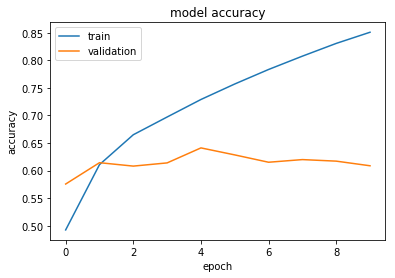

In [38]:
# Plot Accuracy
plotAccuracy(history)

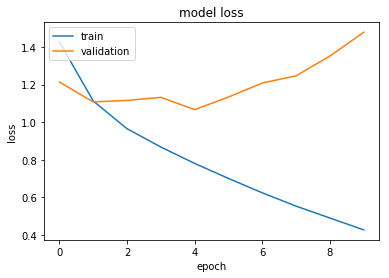

In [39]:
# Plot losses
plotLosses(history)

#### Analysis

- Validation accuracy : 60.87%
- Trainable parameters : 271,146
- The training loss is decreasing, but validation loss is way above and increasing
- Divergence between training and validation accuracy.
- Model is overfitting

### Step 7: Evaluate

In [40]:
# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

In [41]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.4786773986816406, 0.6087]


### Observations

Image classification using Convolutional Neural Network on CIFAR-10 dataset.

- Convolutional Neural network(CNN) 
- Parameters reduced to 271,146 from 855,050 in Nultilayer perceptron(MLP) network
- Training is fast even on CPU with 1.5 mins per epoch
- Shareable parameters across layers
- Better network
- Suffering from Overfitting
- [Overfitting plots](https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/)
- [Plot analysis](https://stats.stackexchange.com/questions/292700/overfitting-in-neural-network)

### References

- [CIFAR-10 Demo](http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html)
- [Learnable Parametersin a Convolutional Neural Network(CNN) explained](https://www.youtube.com/watch?v=gmBfb6LNnZs)
- [How to calculate the number of parameters in the CNN?](https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca#targetText=To%20calculate%20it%2C%20we%20have,3%E2%80%931))%20%3D%2048.)
- [Understanding and Calculating the number of Parameters in Convolution Neural Networks (CNNs)](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)
- [Calculate model parameters in Convolutional Neural Networks (CIFAR-10)](https://stats.stackexchange.com/questions/336908/calculate-model-parameters-in-convolutional-neural-networks-cifar-10)
- [Overfitting plots](https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/)
- [Plot analysis](https://stats.stackexchange.com/questions/292700/overfitting-in-neural-network)

****** END of Basic CNN ******

---------------------------------